In [2]:
import pandas as pd

- let's take a look at the data


In [26]:
data = pd.read_csv('data/1410020101-noSymbol.csv',header=None,engine='python', skiprows=5,skipfooter=21)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,North American Industry Classification System ...,June 2019,July 2019,August 2019,September 2019,October 2019,November 2019,December 2019,January 2020,February 2020,March 2020,April 2020,May 2020,June 2020
1,NaN,Persons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Industrial aggregate including unclassified bu...,"17,268,127","17,063,598","16,880,063","17,194,039","17,230,513","17,207,098","17,230,980","16,792,802","16,757,484","15,828,844","14,044,320","13,773,684","14,689,243"
3,Industrial aggregate excluding unclassified bu...,"16,957,344","16,749,357","16,558,361","16,883,924","16,915,542","16,898,817","16,916,185","16,477,363","16,449,918","15,538,499","13,793,669","13,539,625","14,432,303"
4,Goods producing industries 8,"3,073,670","3,092,368","3,095,380","3,083,282","3,060,314","3,023,667","2,969,948","2,838,126","2,852,630","2,653,933","2,382,683","2,496,445","2,724,433"


- Well, clearly we need to tidy things up, will start with getting rid of the second row as it contains no useful information

In [27]:
data = data.drop([1])
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,North American Industry Classification System ...,June 2019,July 2019,August 2019,September 2019,October 2019,November 2019,December 2019,January 2020,February 2020,March 2020,April 2020,May 2020,June 2020
2,Industrial aggregate including unclassified bu...,"17,268,127","17,063,598","16,880,063","17,194,039","17,230,513","17,207,098","17,230,980","16,792,802","16,757,484","15,828,844","14,044,320","13,773,684","14,689,243"
3,Industrial aggregate excluding unclassified bu...,"16,957,344","16,749,357","16,558,361","16,883,924","16,915,542","16,898,817","16,916,185","16,477,363","16,449,918","15,538,499","13,793,669","13,539,625","14,432,303"
4,Goods producing industries 8,"3,073,670","3,092,368","3,095,380","3,083,282","3,060,314","3,023,667","2,969,948","2,838,126","2,852,630","2,653,933","2,382,683","2,496,445","2,724,433"
5,"Forestry, logging and support 9","43,805","44,917","43,145","40,664","39,104","37,486","36,332","33,266","33,022","32,176","27,189","29,329","37,368"


- That's better, but we need to now transpose the data to facilate plotting

In [28]:
data = data.transpose()
n_header = data.iloc[0] 
data = data[1:]
data.columns = n_header
data.head()

,North American Industry Classification System (NAICS)4,Industrial aggregate including unclassified businesses 6 7,Industrial aggregate excluding unclassified businesses 6 7,Goods producing industries 8,"Forestry, logging and support 9","Mining, quarrying, and oil and gas extraction",Utilities,Construction,Manufacturing,Service producing industries 10,...,"Professional, scientific and technical services",Management of companies and enterprises,"Administrative and support, waste management and remediation services",Educational services,Health care and social assistance,"Arts, entertainment and recreation",Accommodation and food services,Other services (except public administration),Public administration,Unclassified businesses 7
1,June 2019,"17,268,127","16,957,344","3,073,670","43,805","201,653","128,902","1,087,014","1,612,296","13,883,675",...,"980,649","112,681","843,150","1,393,108","2,039,173","338,884","1,380,878","565,703","1,183,612","310,782"
2,July 2019,"17,063,598","16,749,357","3,092,368","44,917","204,459","130,055","1,096,566","1,616,370","13,656,989",...,"986,332","110,331","851,997","1,097,315","2,051,456","357,258","1,404,537","568,653","1,193,954","314,241"
3,August 2019,"16,880,063","16,558,361","3,095,380","43,145","205,423","128,970","1,110,301","1,607,540","13,462,981",...,"987,412","110,082","853,398","950,933","2,049,574","349,650","1,397,348","562,814","1,183,693","321,703"
4,September 2019,"17,194,039","16,883,924","3,083,282","40,664","204,666","127,277","1,116,798","1,593,877","13,800,643",...,"984,220","110,836","857,406","1,319,841","2,051,050","335,493","1,393,370","563,052","1,158,841","310,115"
5,October 2019,"17,230,513","16,915,542","3,060,314","39,104","202,127","128,109","1,108,404","1,582,570","13,855,228",...,"985,905","110,484","857,803","1,445,338","2,046,397","316,852","1,360,207","560,464","1,143,651","314,971"


- Some of the columns are not expressive, so will remove them at they don't provide useful for us as readers. For analysts, more digging is needed!

In [30]:
df_temp = data.copy()
df_temp.drop(['North American Industry Classification System (NAICS)4','Industrial aggregate including unclassified businesses 6 7',
             'Industrial aggregate excluding unclassified businesses 6 7','Unclassified businesses 7',
             'Other services (except public administration)','Service producing industries 10'],axis=1 ,inplace=True)
df_temp = df_temp.replace(',','', regex=True) # removing the commas from all columns at once
df_temp = df_temp.apply(pd.to_numeric, errors='coerce')
df_temp = df_temp.iloc[0:1,:].transpose()
df_temp.columns = ['plot']

- Now we can have our initial plot, exploring the constribution of each sector

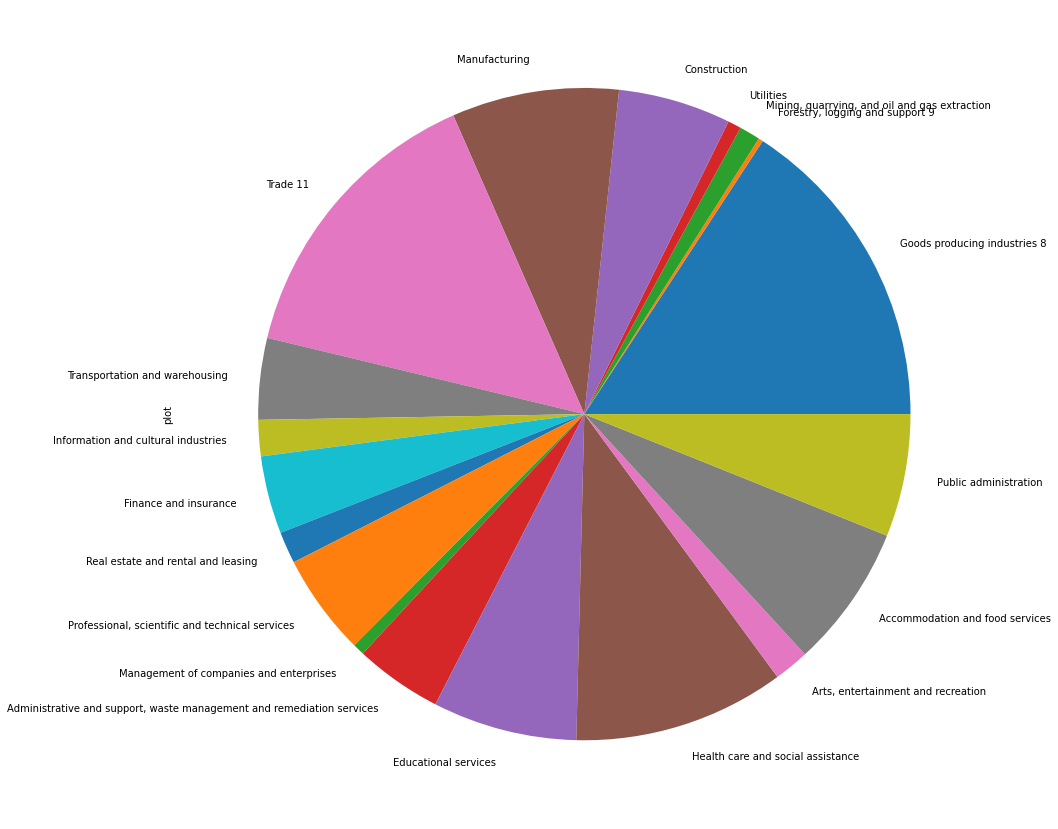

In [31]:
plot = df_temp.plot.pie(y='plot', figsize=(15, 15));
plot.get_legend().remove()

> Trade, good producing industries and health care represent the major players

- Now let's see how each one of these industries are holding up!

In [32]:
# we will first some cleaning and also convert the date column into the porper format
data = data.replace(',','', regex=True) # removing the commas from all columns at once
data.iloc[:,0] = pd.to_datetime(data.iloc[:,0]) # this to_datetim is smart, let it do what it can first before trying to enforce a certain format

In [34]:
data.head()

,North American Industry Classification System (NAICS)4,Industrial aggregate including unclassified businesses 6 7,Industrial aggregate excluding unclassified businesses 6 7,Goods producing industries 8,"Forestry, logging and support 9","Mining, quarrying, and oil and gas extraction",Utilities,Construction,Manufacturing,Service producing industries 10,...,"Professional, scientific and technical services",Management of companies and enterprises,"Administrative and support, waste management and remediation services",Educational services,Health care and social assistance,"Arts, entertainment and recreation",Accommodation and food services,Other services (except public administration),Public administration,Unclassified businesses 7
1,2019-06-01,17268127,16957344,3073670,43805,201653,128902,1087014,1612296,13883675,...,980649,112681,843150,1393108,2039173,338884,1380878,565703,1183612,310782
2,2019-07-01,17063598,16749357,3092368,44917,204459,130055,1096566,1616370,13656989,...,986332,110331,851997,1097315,2051456,357258,1404537,568653,1193954,314241
3,2019-08-01,16880063,16558361,3095380,43145,205423,128970,1110301,1607540,13462981,...,987412,110082,853398,950933,2049574,349650,1397348,562814,1183693,321703
4,2019-09-01,17194039,16883924,3083282,40664,204666,127277,1116798,1593877,13800643,...,984220,110836,857406,1319841,2051050,335493,1393370,563052,1158841,310115
5,2019-10-01,17230513,16915542,3060314,39104,202127,128109,1108404,1582570,13855228,...,985905,110484,857803,1445338,2046397,316852,1360207,560464,1143651,314971


In [38]:
# we need to rename the date column

In [39]:
cols = data.columns.drop('North American Industry Classification System (NAICS)4')
df = data[cols].copy()
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df['date'] = data['North American Industry Classification System (NAICS)4']

In [40]:
df = df.set_index('date')

In [41]:
df

,Industrial aggregate including unclassified businesses 6 7,Industrial aggregate excluding unclassified businesses 6 7,Goods producing industries 8,"Forestry, logging and support 9","Mining, quarrying, and oil and gas extraction",Utilities,Construction,Manufacturing,Service producing industries 10,Trade 11,...,"Professional, scientific and technical services",Management of companies and enterprises,"Administrative and support, waste management and remediation services",Educational services,Health care and social assistance,"Arts, entertainment and recreation",Accommodation and food services,Other services (except public administration),Public administration,Unclassified businesses 7
date,,,,,,,,,,,,,,,,,,,,,
2019-06-01,17268127,16957344,3073670,43805,201653,128902,1087014,1612296,13883675,2854275,...,980649,112681,843150,1393108,2039173,338884,1380878,565703,1183612,310782
2019-07-01,17063598,16749357,3092368,44917,204459,130055,1096566,1616370,13656989,2850623,...,986332,110331,851997,1097315,2051456,357258,1404537,568653,1193954,314241
2019-08-01,16880063,16558361,3095380,43145,205423,128970,1110301,1607540,13462981,2839282,...,987412,110082,853398,950933,2049574,349650,1397348,562814,1183693,321703
2019-09-01,17194039,16883924,3083282,40664,204666,127277,1116798,1593877,13800643,2830843,...,984220,110836,857406,1319841,2051050,335493,1393370,563052,1158841,310115
2019-10-01,17230513,16915542,3060314,39104,202127,128109,1108404,1582570,13855228,2833387,...,985905,110484,857803,1445338,2046397,316852,1360207,560464,1143651,314971
2019-11-01,17207098,16898817,3023667,37486,199968,127743,1086916,1571554,13875151,2863626,...,988956,111613,853556,1473966,2053793,293919,1333759,559817,1142802,308281
2019-12-01,17230980,16916185,2969948,36332,200894,127925,1038021,1566776,13946237,2901143,...,998022,113498,838939,1472271,2069007,291275,1335964,560511,1138872,314795
2020-01-01,16792802,16477363,2838126,33266,198115,127272,945049,1534424,13639237,2823966,...,983486,112208,800565,1408323,2056591,286901,1301420,544182,1132871,315439
2020-02-01,16757484,16449918,2852630,33022,198053,125872,961719,1533965,13597288,2778437,...,983236,114341,796399,1469437,2046515,287804,1283677,541159,1136346,307566


In [42]:
# let's look at all coolumns
df.columns

Index(['Industrial aggregate including unclassified businesses 6 7',
       'Industrial aggregate excluding unclassified businesses 6 7',
       'Goods producing industries 8', 'Forestry, logging and support 9',
       'Mining, quarrying, and oil and gas extraction', 'Utilities',
       'Construction', 'Manufacturing', 'Service producing industries 10',
       'Trade 11', 'Transportation and warehousing',
       'Information and cultural industries', 'Finance and insurance',
       'Real estate and rental and leasing',
       'Professional, scientific and technical services',
       'Management of companies and enterprises',
       'Administrative and support, waste management and remediation services',
       'Educational services', 'Health care and social assistance',
       'Arts, entertainment and recreation', 'Accommodation and food services',
       'Other services (except public administration)',
       'Public administration', 'Unclassified businesses 7'],
      dtype='object',

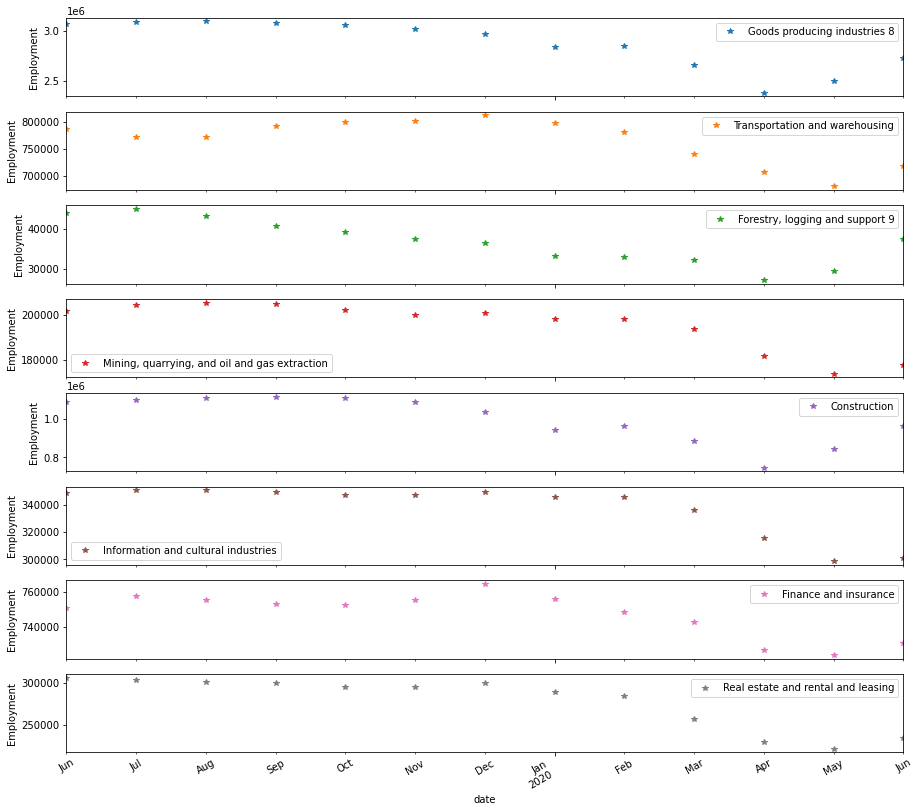

In [46]:
cols_plot = ['Goods producing industries 8','Transportation and warehousing', 'Forestry, logging and support 9',
             'Mining, quarrying, and oil and gas extraction', 'Construction','Information and cultural industries',
            'Finance and insurance','Real estate and rental and leasing']
axes = df[cols_plot].plot(marker='*', linestyle='None', figsize=(15, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('Employment')

- The good news that we see all industries rebounding in June and some are even since April. However, some industriesare clearly boucing much faster than others such Forestry and Good producing industry as well as Construction. The least improvements is seen in Finance, Real State and Transportation. Lagging far behind are Mining, oil and gas and Information and cultural industries. 